In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
import sim
import compare

C:\Users\pinak\Documents\GitHub\sphere-fp


<IPython.core.display.Javascript object>


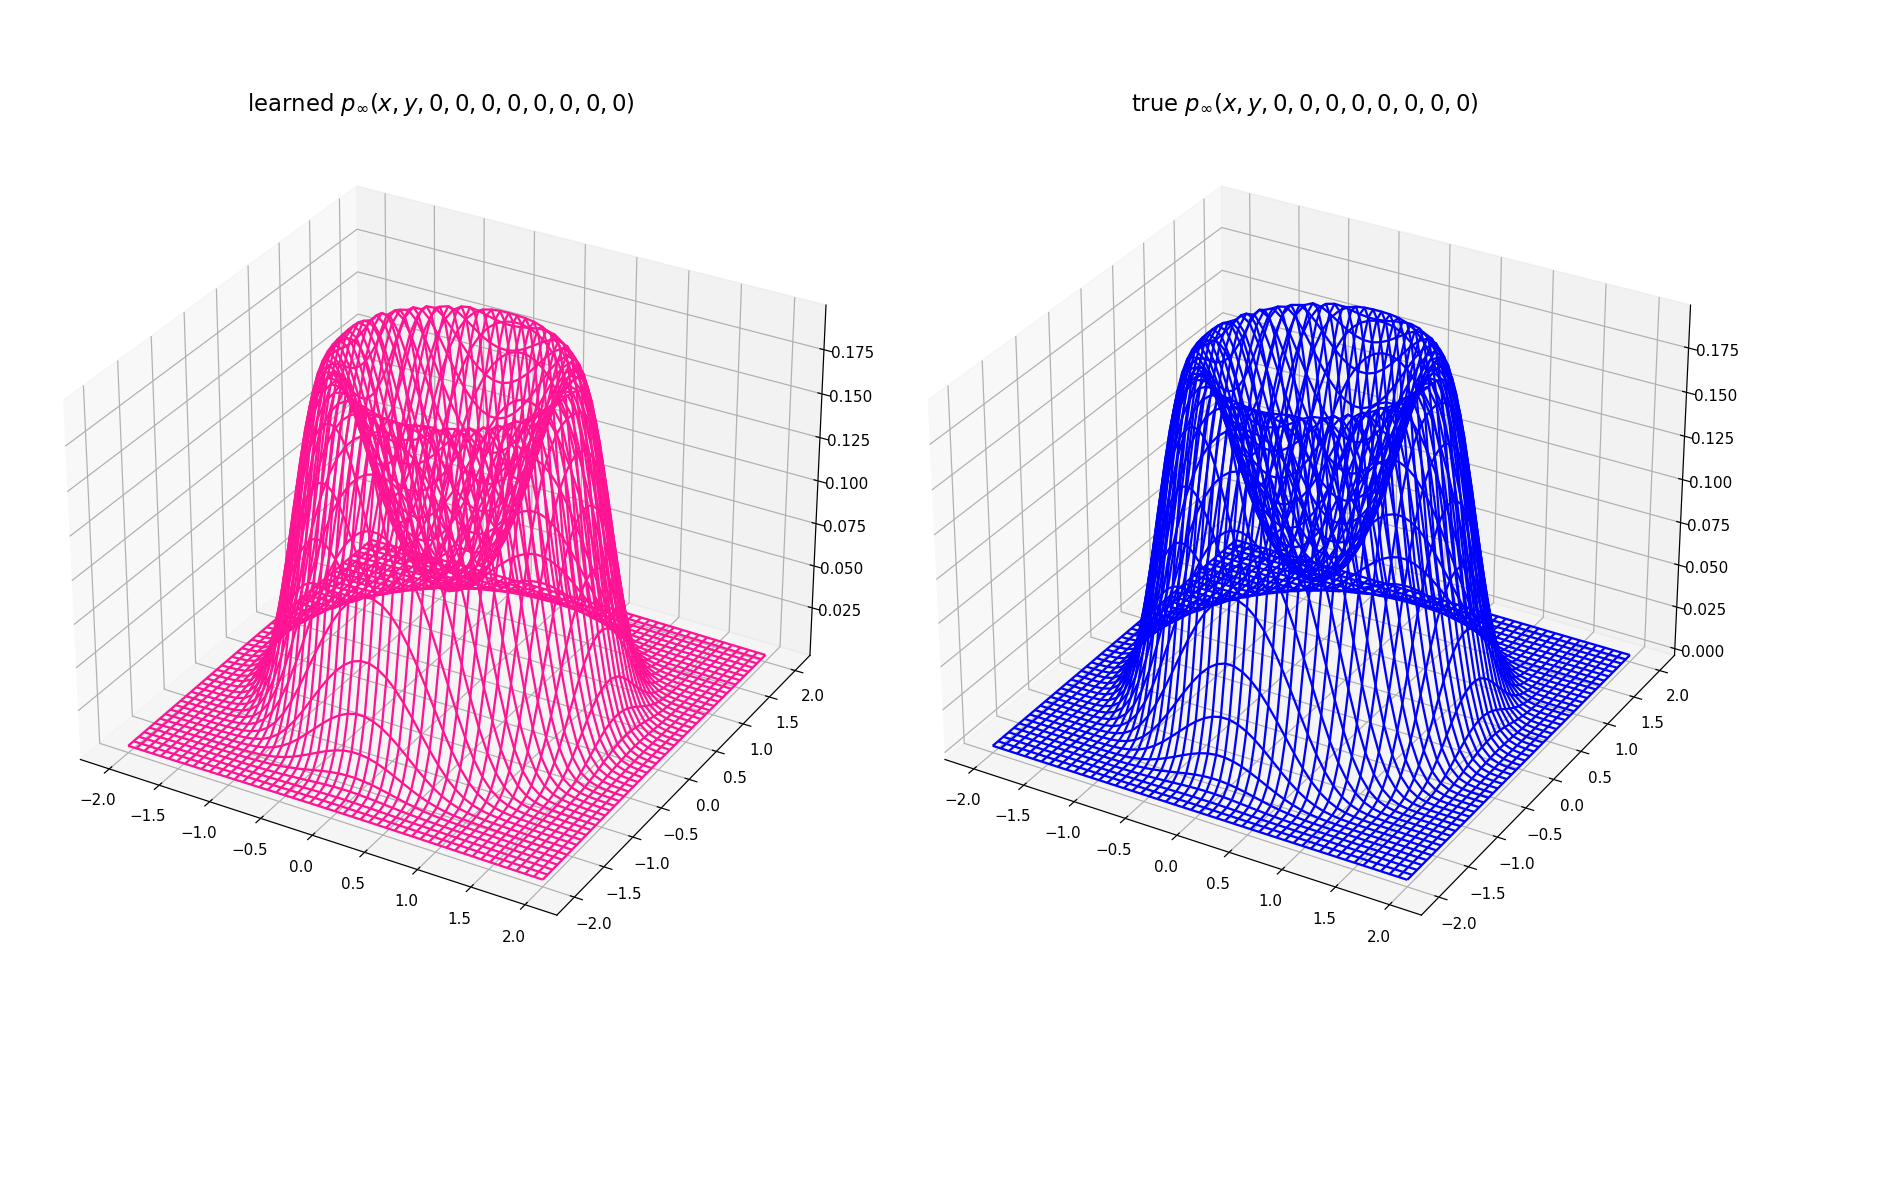

In [22]:
from scipy.special import erf
D = 1.
def p_inf2(x, y):
  Z = 0.5 * np.sqrt(np.pi**3 * D) * (1. + erf(1/np.sqrt(D)))
  return tf.exp(-(x**2 + y**2 - 1.)**2 / D) / Z 

def p_inf(x, y, x1, y1, x2, y2, x3, y3, x4, y4):
  return p_inf2(x, y) * p_inf2(x1, y1) * p_inf2(x2, y2) * p_inf2(x3, y3) * p_inf2(x4, y4)

dim = 10
#domain = mc.get_grid()
net = arch.LSTMForgetNet(num_nodes=50, num_blocks=3)
net.load_weights('../../data/{0}D/460/sphere{0}D'.format(dim)).expect_partial()
sol = lambda x, y, *args: tf.exp(net(*args))


def learned(x, y):
  z = tf.zeros_like(x)
  zs = [z] * (dim - 4)
  return tf.exp(net(tf.zeros_like(x), tf.zeros_like(x), x, y, *zs))

def true(x, y):
  z = tf.zeros_like(x)
  zs = [z] * (dim - 4)
  return p_inf(tf.zeros_like(x), tf.zeros_like(x), x, y, *zs)


def plot_solutions_3D(learned, resolution, low, high):
  delta = (high[0] - low[0]) * (high[1] - low[1]) / (resolution-1)**2
  fig = plt.figure(figsize=(16, 10))
  ax_l = fig.add_subplot(121, projection='3d')
  ax_t = fig.add_subplot(122, projection='3d')
  x = np.linspace(low[0], high[0], num=resolution, endpoint=True).astype('float32')
  y = np.linspace(low[1], high[1], num=resolution, endpoint=True).astype('float32')
  y = np.repeat(y, resolution, axis=0).reshape((-1, 1))
  x = np.array(list(x) * resolution).reshape((-1, 1))
  z_l = learned(x, y).numpy()
  z_l = z_l/(z_l.sum() * delta)
  z_t = true(x, y).numpy()
  z_t = z_t/(z_t.sum() * delta)
  grid = (resolution, resolution)
  x = x.reshape(grid)
  y = y.reshape(grid)
  z_l = z_l.reshape(grid)
  z_t = z_t.reshape(grid)
  ax_l.plot_wireframe(x, y, z_l, color='deeppink')
  ax_t.plot_wireframe(x, y, z_t, color="blue")
  ax_l.set_title('learned $p_\infty(x, y, 0, 0, 0, 0, 0, 0, 0, 0)$', fontsize=15)
  ax_t.set_title('true $p_\infty(x, y, 0, 0, 0, 0, 0, 0, 0, 0)$', fontsize=15)
  plt.tight_layout()
  plt.savefig('learned_vs_truth.png')
  plt.show()

plot_solutions_3D(learned=learned, resolution=50, low=[-2., -2.], high=[2., 2.])